In [1]:
import pandas as pd

In [2]:
gi = pd.read_excel('giraffe.xlsx')

In [3]:
gi_orig_size = len(gi.index)
print(f'giraffe data has {gi_orig_size} rows')

giraffe data has 1582 rows


In [4]:
for c in gi.columns:
    print(c)

DATE
DATE.1
IMAGE ID
INDIVIDUAL
CORRIDOR
CAMERA
HOUR
SEX
DIRECTION
Direction (numerical)
IN
OUT
GROUP SIZE
CAMERA TEMPERATURE
MOONPHASE
Passage W/O along
Passage
COMMENT
MOON LUMINOSITY
MEAN TEMP
PRESSURE
HUMIDITY
WIND SPEED
CLOUD COVERAGE
DATE.2


In [5]:
# drop irrelevant cols
gi = gi.drop(['IMAGE ID', 'INDIVIDUAL', 'CAMERA', 
             'CAMERA TEMPERATURE','MOONPHASE',
              'Direction (numerical)'], axis=1)

In [6]:
# drop missing data and outlier
gi = gi[(gi.Passage != '*') & (gi.Passage != 713)]
gi = gi[gi.Passage.isna() == False]

In [10]:
print('{:.2f}% of data remaining after filter on Passage'
      .format(len(gi.index) / gi_orig_size))

0.90% of data remaining after filter on Passage


In [11]:
gi.Passage.dtype

dtype('O')

In [12]:
# convert to numeric
gi['Passage'] = gi['Passage'].astype(int)

In [13]:
gi.Passage.dtype

dtype('int64')

In [14]:
# drop missing HOUR values
gi = gi[gi.HOUR.isna() == False]
print('{:.2f}% of data remaining after filter on HOUR'
      .format(len(gi.index) / gi_orig_size))

0.45% of data remaining after filter on HOUR


Det fanns mycket saknade HOUR värden..

### Vilken tid på dygnet använder girafferna korridoren? Passage vs hour

In [90]:
# set hour to int
gi['HOUR'] = gi['HOUR'].astype(int)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [19]:
hour_group = gi.groupby('HOUR').sum()['Passage'].reset_index()

In [69]:
palette = sns.color_palette("RdBu_r", 7)

Text(0.5, 1.0, 'Passages in either direction by hour')

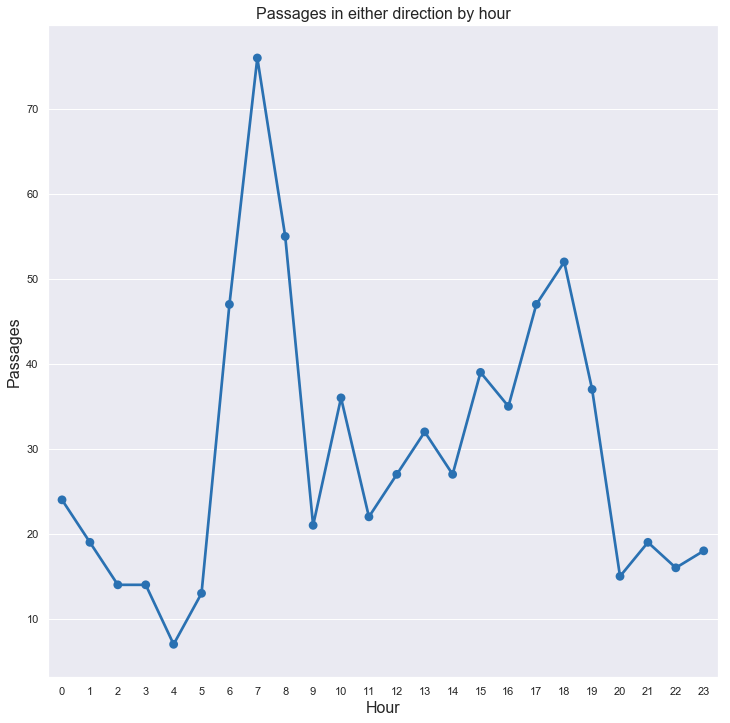

In [91]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='HOUR', y='Passage', data=hour_group,
                  color=palette[0])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages in either direction by hour', fontsize=16)

### Hur många passager görs respektive månad? Passage vs månad

In [28]:
month_group = gi.groupby('DATE.1').sum()['Passage'].reset_index()

In [31]:
month_group

,DATE.1,Passage
0,april,47
1,augusti,75
2,december,88
3,februari,31
4,januari,38
5,juli,103
6,juni,50
7,maj,22
8,mars,50
9,november,57


In [139]:
a="""January
February
March
April
May
June
July
August
September
October
November
December"""

In [140]:
months = a.split('\n')

In [141]:
months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

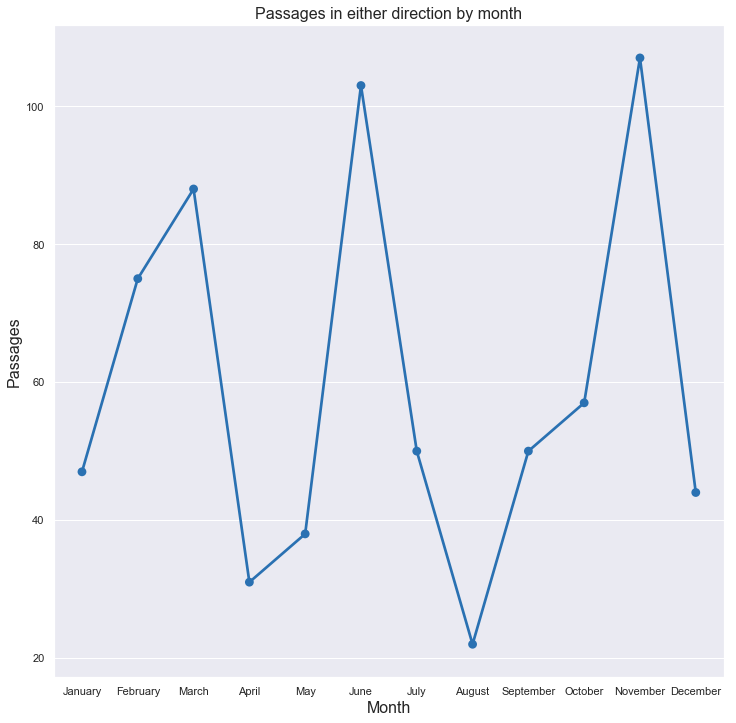

In [145]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='DATE.1', y='Passage', data=month_group,
                  color=palette[0])
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages in either direction by month', fontsize=16)
_=ax.set_xticklabels(
    ['January','February','March','April','May',
     'June','July','August','September','October',
     'November','December']
)

### Vilken tid på dygnet går de in? In/direction vs hour

In [94]:
in_group = gi[gi.DIRECTION == 'IN'].groupby('HOUR').sum()['Passage'].reset_index()

Text(0.5, 1.0, 'Passages going in by hour')

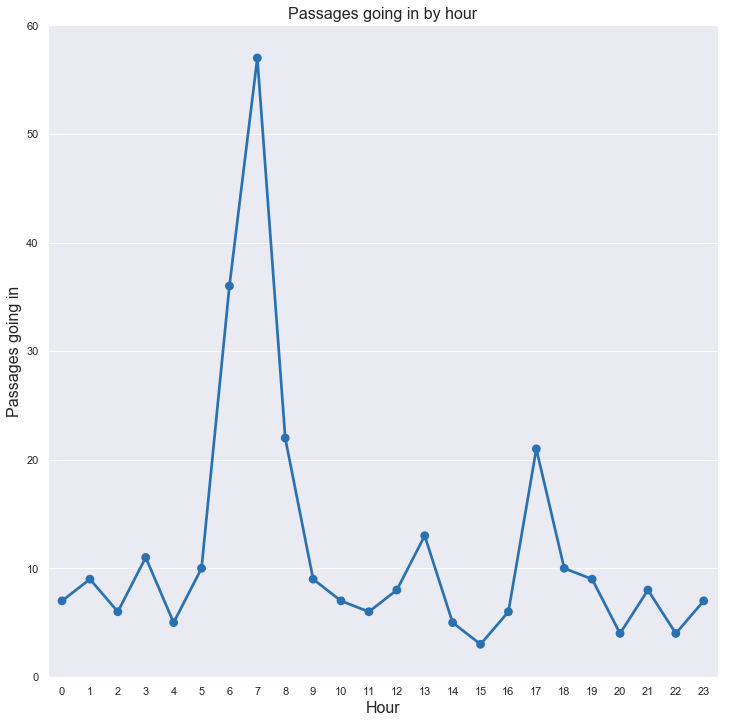

In [95]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='HOUR', y='Passage', data=in_group,
                  color=palette[0])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages going in', fontsize=16)
ax.set_title('Passages going in by hour', fontsize=16)

### Vilken tid på dygnet går de in? In/direction vs hour

In [96]:
out_group = gi[gi.DIRECTION == 'OUT'].groupby('HOUR').sum()['Passage'].reset_index()

Text(0.5, 1.0, 'Passages going out by hour')

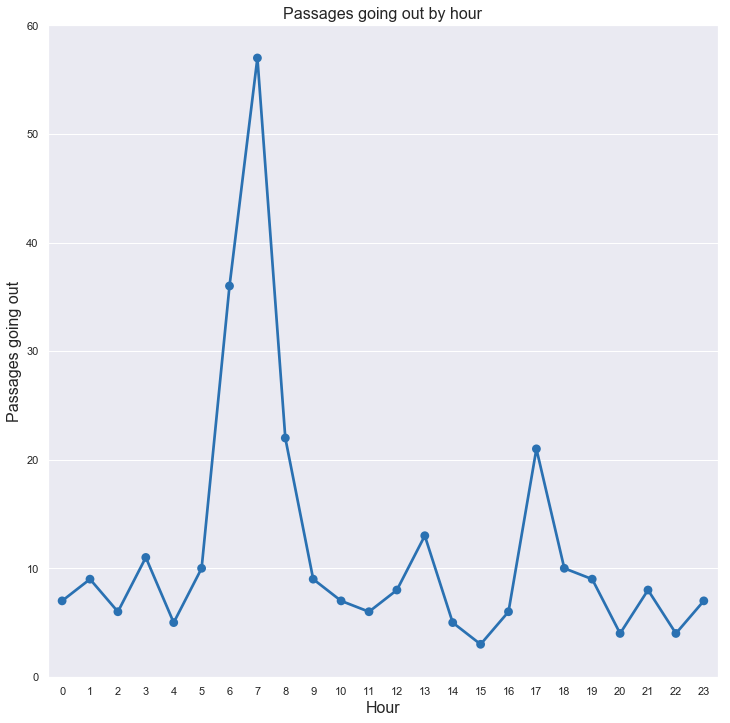

In [97]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='HOUR', y='Passage', data=in_group, 
                   color=palette[0])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages going out', fontsize=16)
ax.set_title('Passages going out by hour', fontsize=16)

### Det kanske går att göra en graf med tre variabler både för in, ut och timme?

In [64]:
import matplotlib.patches as mpatches

In [114]:
direction_group = gi[(gi.DIRECTION == 'IN') | (gi.DIRECTION == 'OUT')].groupby(['HOUR', 'DIRECTION']).sum()['Passage'].reset_index()

Text(0.5, 1.0, 'Passages by hour')

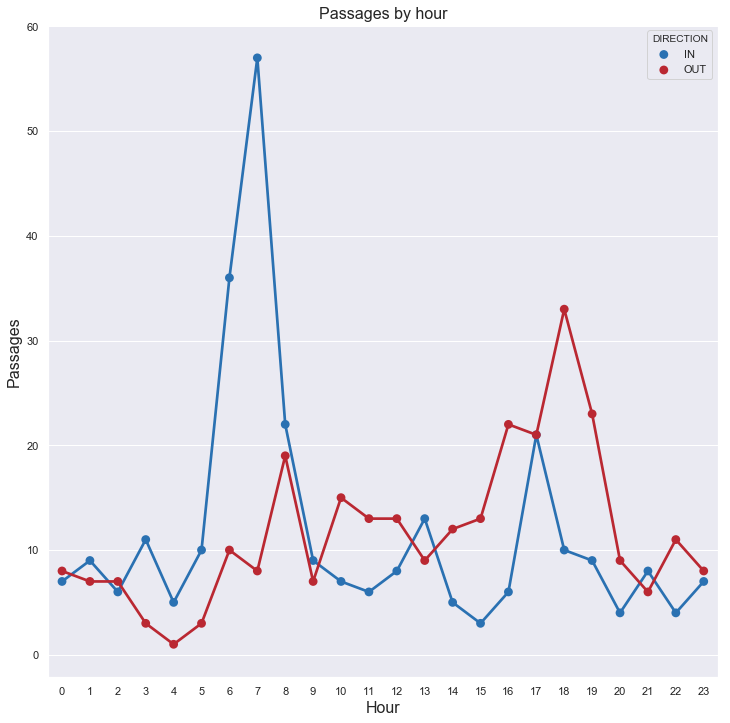

In [115]:
fig, ax = plt.subplots(figsize=(12,12))
sns.pointplot(x='HOUR', y='Passage', hue='DIRECTION', 
              data=direction_group, palette=[palette[0], palette[-1]])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages by hour', fontsize=16)

In [80]:
# drop SEX missing values
gi = gi[gi['SEX'].isna() == False]

In [86]:
sex_group = gi.groupby(['HOUR', 'SEX']).sum()['Passage'].reset_index()

Text(0.5, 1.0, 'Passages by hour')

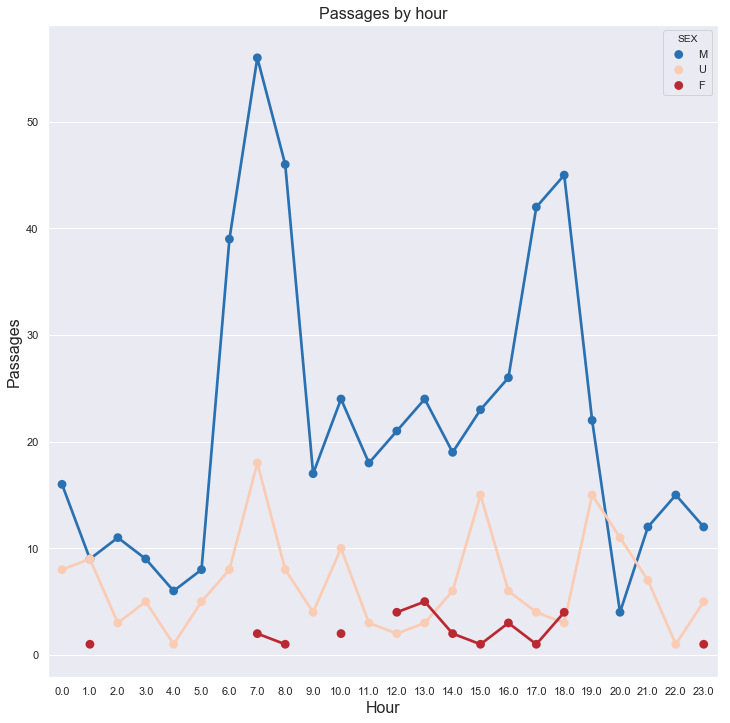

In [104]:
fig, ax = plt.subplots(figsize=(12,12))
sns.pointplot(x='HOUR', y='Passage', hue='SEX', 
              data=sex_group, palette=[palette[0], palette[4], palette[-1]])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages by hour', fontsize=16)

### Hur många djur använder korridoren samtidigt? Passage vs group size

In [117]:
gi['GROUP SIZE'] = gi['GROUP SIZE'].astype(int)

In [118]:
group_size = gi.groupby('GROUP SIZE').sum()['Passage'].reset_index()

In [121]:
group_size

,GROUP SIZE,Passage
0,1,449
1,2,105
2,3,36
3,4,28
4,5,39
5,6,24
6,7,7
7,8,8
8,15,15


Text(0.5, 1.0, 'Passages in different group sizes')

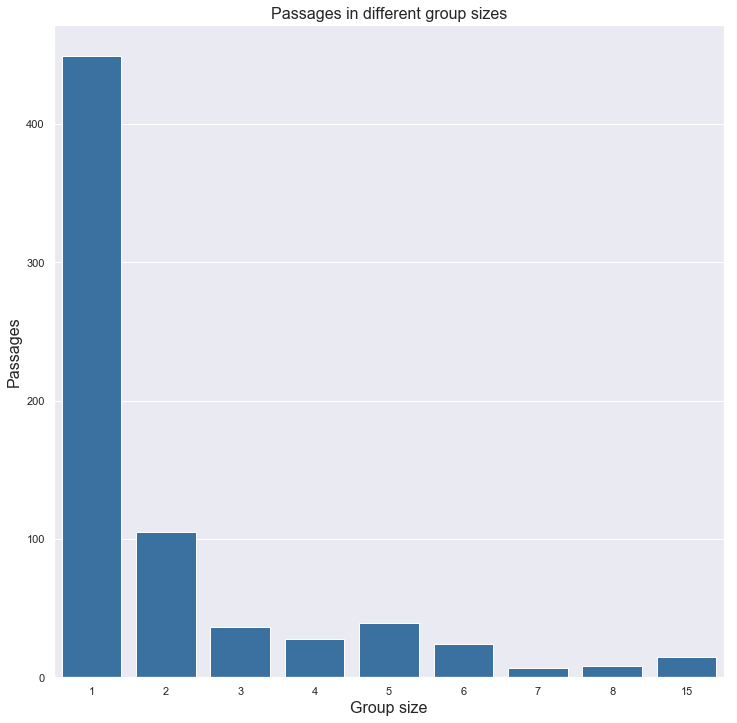

In [127]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(x='GROUP SIZE', y='Passage', 
            data=group_size, ax=ax, color=palette[0])
ax.set_xlabel('Group size', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages in different group sizes', fontsize=16)

### Hur många passager utgörs av ensamma handjur eller hanar i grupper om 3 eller färre? Dvs group size ≤3 där alla individer är hanar ”sex=M”, alternativt sex=U men det blir kanske för osäkert.

In [148]:
male_group_size = gi[(gi['SEX'] == 'M') & (gi['GROUP SIZE'] <= 3)]\
.groupby('GROUP SIZE').sum()['Passage'].reset_index()

In [149]:
male_group_size

,GROUP SIZE,Passage
0,1,359
1,2,81
2,3,27


Text(0.5, 1.0, 'Passages by males in groups sizes <= 3')

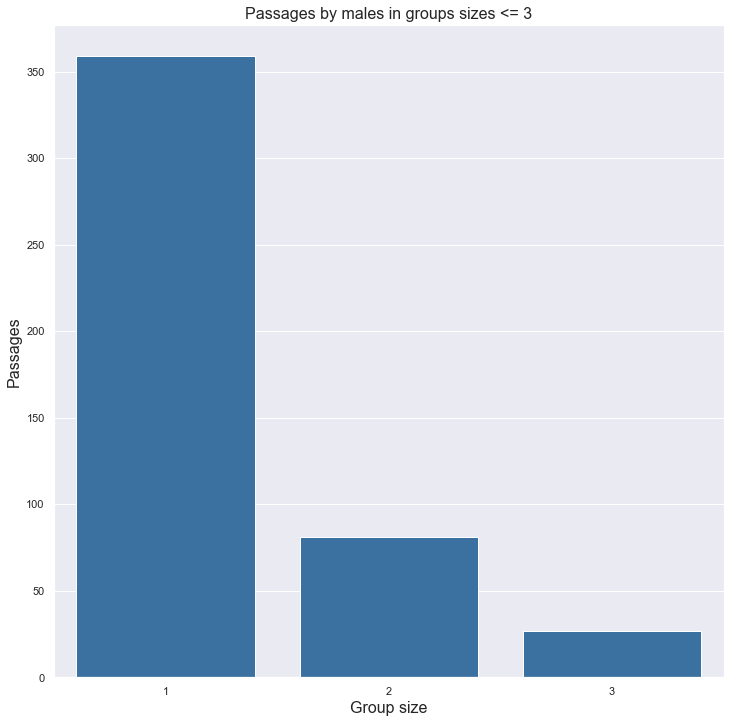

In [151]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(x='GROUP SIZE', y='Passage', 
            data=male_group_size, ax=ax, color=palette[0])
ax.set_xlabel('Group size', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages by males in groups sizes <= 3', fontsize=16)

In [ ]:
we_json = pd.read_json('weather_nanyuki_owm.json')

In [ ]:
gi_raw = pd.read_excel('giraffe_raw.xlsx')